In [1]:
import numpy as np
import pandas as pd
#import time dependencies
# from datetime import datetime
import time
from datetime import date, timedelta
import datetime
#import statistics dependencies
from scipy.stats import linregress
#import matplotlib dependencies
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as mlines
# Import the API key.
from config import EIA_key
import eia
# Import the requests library.
import requests

#### Start and End Date for Matplotlib

In [2]:
start_date = "2018-01-01"
end_date =  datetime.datetime.now()
# end_date= datetime.datetime.now()

# API Call for UK/Turkish/Spanish/South Korean/Japanese/Chinese/Italian/French Gas Imports

In [3]:
# UK API
API_Call_UK=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_UK= "Liquefied U.S. Natural Gas Exports by Vessel to United Kingdom, Monthly"
Series_ID_UK= "NG.NGM_EPG0_EVE_NUS-NUK_MMCF.M"
# Turkish API
API_Call_TK=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_TK= "Liquefied U.S. Natural Gas Exports by Vessel to Turkey, Monthly"
Series_ID_TK= "NG.NGM_EPG0_EVE_NUS-NTU_MMCF.M"
#Spanish API
API_Call_SP=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_SP= "U.S. Liquefied Natural Gas Exports by Vessel to Spain, Monthly"
Series_ID_SP= "NG.NGM_EPG0_EVE_NUS-NSP_MMCF.M"
#South Korean API
API_Call_SK=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_SK= "Liquefied U.S. Natural Gas Exports by Vessels to South Korea, Monthly"
Series_ID_SK= "NG.NGM_EPG0_EVE_NUS-NKS_MMCF.M"
#Japanese API
API_Call_JP=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_JP= "Liquefied U.S. Natural Gas Exports by Vessel to Japan, Monthly"
Series_ID_JP= "NG.NGM_EPG0_EVE_NUS-NJA_MMCF.M"
#Chinese API
API_Call_CH=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_CH= "U.S. Liquefied Natural Gas Exports by Vessel to China, Monthly"
Series_ID_CH= "NG.NGM_EPG0_EVE_NUS-NCH_MMCF.M"
#Italian API
API_Call_IT=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_IT= "Liquefied U.S. Natural Gas Exports by Vessel to Italy, Monthly"
Series_ID_IT= "NG.NGM_EPG0_EVE_NUS-NIT_MMCF.M"
#French API
API_Call_FR=f"http://api.eia.gov/series/?api_key={EIA_key}&series_id=PET.WCESTUS1.W"
Series_Name_FR= "U.S. Liquefied Natural Gas Exports by Vessel to France, Monthly"
Series_ID_FR= "NG.NGM_EPG0_EVE_NUS-NFR_MMCF.M"

In [4]:
API_Calls=[API_Call_UK, API_Call_TK, API_Call_SP, API_Call_SK, API_Call_JP, API_Call_CH, API_Call_IT,API_Call_FR]
Series_Names=[Series_Name_UK, Series_Name_TK, Series_Name_SP, Series_Name_SK, Series_Name_JP, Series_Name_CH, Series_Name_IT, Series_Name_FR]
Series_IDs=[Series_ID_UK, Series_ID_TK, Series_ID_SP, Series_ID_SK, Series_ID_JP, Series_ID_CH, Series_ID_IT, Series_ID_FR]

# list_countries=[UKGasImports, TurkishGasImports, SpanishGasImports, SouthKoreaGasImports, JapaneseGasImports]
list_headers=['Liquefied U.S. Natural Gas Exports by Vessel to United Kingdom, Monthly (Million Cubic Feet)',
             'Liquefied U.S. Natural Gas Exports by Vessel to Turkey, Monthly (Million Cubic Feet)',
             'U.S. Liquefied Natural Gas Exports by Vessel to Spain, Monthly (Million Cubic Feet)',
             'Liquefied U.S. Natural Gas Exports by Vessels to South Korea, Monthly (Million Cubic Feet)',
             'Liquefied U.S. Natural Gas Exports by Vessel to Japan, Monthly (Million Cubic Feet)',
             'U.S. Liquefied Natural Gas Exports by Vessel to China, Monthly (Million Cubic Feet)',
             'Liquefied U.S. Natural Gas Exports by Vessel to Italy, Monthly (Million Cubic Feet)',
             'U.S. Liquefied Natural Gas Exports by Vessel to France, Monthly (Million Cubic Feet)']
numbers=(1,2,3,4,5,6,7,8)
names=('UK_Gas_Imports','Turkish_Gas_Imports','Korean_Gas_Imports','Japanese_Gas_Imports','Chinese_Gas_Imports','Spanish_Gas_Imports','Italian_Gas_Imports', 'French_Gas_Imports')

In [5]:
d={}
imports=[] 
bigdf = pd.DataFrame()
UK_Gas_Imports=pd.DataFrame()
Turkish_Gas_Imports=pd.DataFrame()
Korean_Gas_Imports=pd.DataFrame()
Japanese_Gas_Imports=pd.DataFrame()
Chinese_Gas_Imports=pd.DataFrame()
Spanish_Gas_Imports=pd.DataFrame()
Italian_Gas_Imports=pd.DataFrame()
French_Gas_Imports=pd.DataFrame()

for i,j,k,m,n,name in zip(API_Calls, Series_Names, Series_IDs, list_headers, numbers, names):
    API_Call=i
    Series_Name= j
    Series_ID= k
    #install EIA package--- pip install EIA_python
    #pip install pyOpenSSL to get around SSL error
    #these are the API keys I set up
    api_key = EIA_key
    api = eia.API(api_key)
    #import data but still need to clean it
    series_search = api.data_by_series(series=Series_ID)
    df = pd.DataFrame(series_search)
    # define a series and pass through api and Series_ID
    def retrieve_time_series(api, Series_ID):
        """
        Return the time series dataframe, based on API and unique Series ID
        """
        #Retrieve Data By Series ID 
        series_search = api.data_by_series(series=Series_ID)
        ##Create a pandas dataframe from the retrieved time series
        global df
        df = pd.DataFrame(series_search)
        return df
    # define another function main to run the script through
    def main():
        """
        Run main script
        """
        #Create EIA API using your specific API key
        api_key = EIA_key
        api = eia.API(api_key)
    #     #Declare desired series ID
    #     Series_ID="PET.WGTSTUS1.W"
        df=retrieve_time_series(api, Series_ID)
        #Print the returned dataframe df
        print(df)
    req = requests.get(i, verify = False)
    #Clean the dataframe by resetting the index because the date is automatically set as the index
    df.reset_index(inplace=True)
    #{original header: new name given}
    df.rename(columns={m:name}, inplace=True)
    #{index:Date}
    df.rename(columns={'index':'Date'}, inplace=True)
    #create a dataframe [[date, name of each country]]
    d=df[['Date', name]]
    #convert date to datetime[64]
    d['Date']=pd.to_datetime(d['Date'], errors='coerce')
    bigdf['Date']=d['Date']
    bigdf[name] = d[name]
bigdf

,Date,UK_Gas_Imports,Turkish_Gas_Imports,Korean_Gas_Imports,Japanese_Gas_Imports,Chinese_Gas_Imports,Spanish_Gas_Imports,Italian_Gas_Imports,French_Gas_Imports
0,2018-10-01,3410,0,0,0,4375,0,3328,4846.0
1,2018-11-01,6267,0,0,0,4421,0,3120,9991.0
2,2018-12-01,3624,0,0,0,1463,0,3372,3453.0
3,2019-01-01,7213,0,0,0,5854,0,0,7303.0
4,2019-03-01,20695,0,0,0,5884,1127,0,20853.0
5,2019-04-01,13499,0,0,0,1462,0,0,17092.0
6,2019-05-01,10373,0,2930,0,2929,0,0,6621.0
7,2019-08-01,3711,0,0,0,5850,0,0,3249.0
8,2019-09-01,3669,2941,0,0,4385,0,0,6740.0
9,2019-10-01,1335,0,0,0,2958,0,0,14228.0


# Chinese Imports of Natural Gas From the US

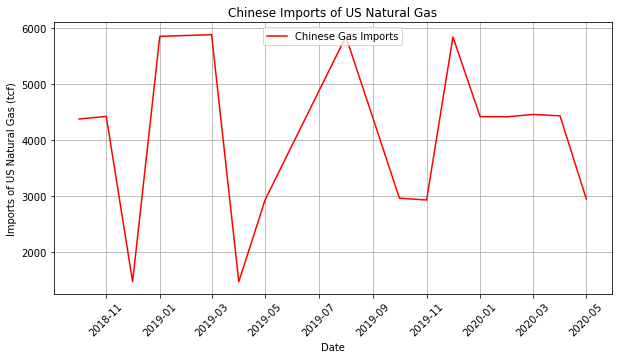

In [6]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=True, figsize=(10,5))
ax1.set_xlabel('Date')
ax1.set_ylabel('Imports of US Natural Gas (tcf)')
ax1.plot(bigdf['Date'], bigdf['Chinese_Gas_Imports'], color='red')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
ax1.tick_params(axis='y')
ax1.set_title("Chinese Imports of US Natural Gas")
ax1.grid()
red_line = mlines.Line2D([], [], color='red', label='Chinese Gas Imports')
plt.legend(handles=[red_line], loc='upper center')
plt.savefig("Imports_By_Country_Images/Chinese_Gas_Imports.png", bbox_inches='tight')

# Japanese Gas Imports of Natural Gas From the US

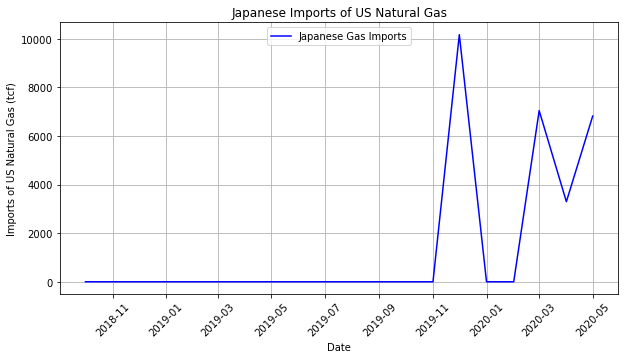

In [7]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax1=plt.subplots(frameon=False, figsize=(10,5))
ax1.set_xlabel('Date')
ax1.set_ylabel('Imports of US Natural Gas (tcf)')
ax1.plot(bigdf['Date'], bigdf['Japanese_Gas_Imports'], color='blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax1.tick_params(axis='y')
ax1.set_title("Japanese Imports of US Natural Gas")
ax1.grid()
red_line = mlines.Line2D([], [], color='blue', label='Japanese Gas Imports')
plt.legend(handles=[red_line], loc='upper center')
plt.savefig("Imports_By_Country_Images/Jap_Gas_Imports.png", bbox_inches='tight')

# Korean/Japanese/Chinese Natural Gas Imports From the US

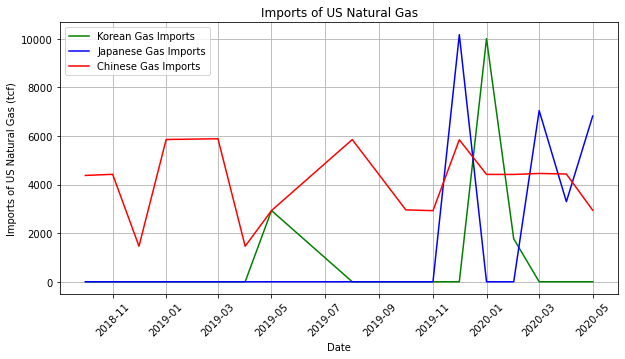

In [8]:
# plot crude storage and gasoline storage on one graph with two axes
fig, ax=plt.subplots(frameon=False, figsize=(10,5))
ax.set_xlabel('Date')
ax.set_ylabel('Imports of US Natural Gas (tcf)')
ax.plot(bigdf['Date'], bigdf['Korean_Gas_Imports'], color='green')
ax.plot(bigdf['Date'], bigdf['Japanese_Gas_Imports'], color='blue')
ax.plot(bigdf['Date'], bigdf['Chinese_Gas_Imports'], color='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=45)
# ax1.tick_params(axis='y')
ax.set_title("Imports of US Natural Gas")
ax.grid()

green_line = mlines.Line2D([], [], color='green', label='Korean Gas Imports')
blue_line = mlines.Line2D([], [], color='blue', label='Japanese Gas Imports')
red_line = mlines.Line2D([], [], color='red', label='Chinese Gas Imports')

plt.legend(handles=[green_line, blue_line, red_line], loc='upper left')
plt.savefig("Imports_By_Country_Images/Korean_Gas_Imports.png", bbox_inches='tight')